In [66]:
import importlib
from idlelib.run import fixdoc

import matplotlib.pyplot as plt
# 8
import pandas as pd

import isl_data

importlib.reload(isl_data)

college = pd.read_csv(isl_data.College)
print(college.columns)
college[:3]

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [67]:
college2 = pd.read_csv(isl_data.College, index_col=0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
print(college3.columns)
print(college3.index)


Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')
Index(['Abilene Christian University', 'Adelphi University', 'Adrian College',
       'Agnes Scott College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College',
       ...
       'Winthrop University', 'Wisconsin Lutheran College',
       'Wittenberg University', 'Wofford College',
       'Worcester Polytechnic Institute', 'Worcester State College',
       'Xavier University', 'Xavier University of Louisiana',
       'Yale University', 'York College of Pennsylvania'],
      dtype='object', name='College', length=777)


In [68]:
#c
college = college3
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

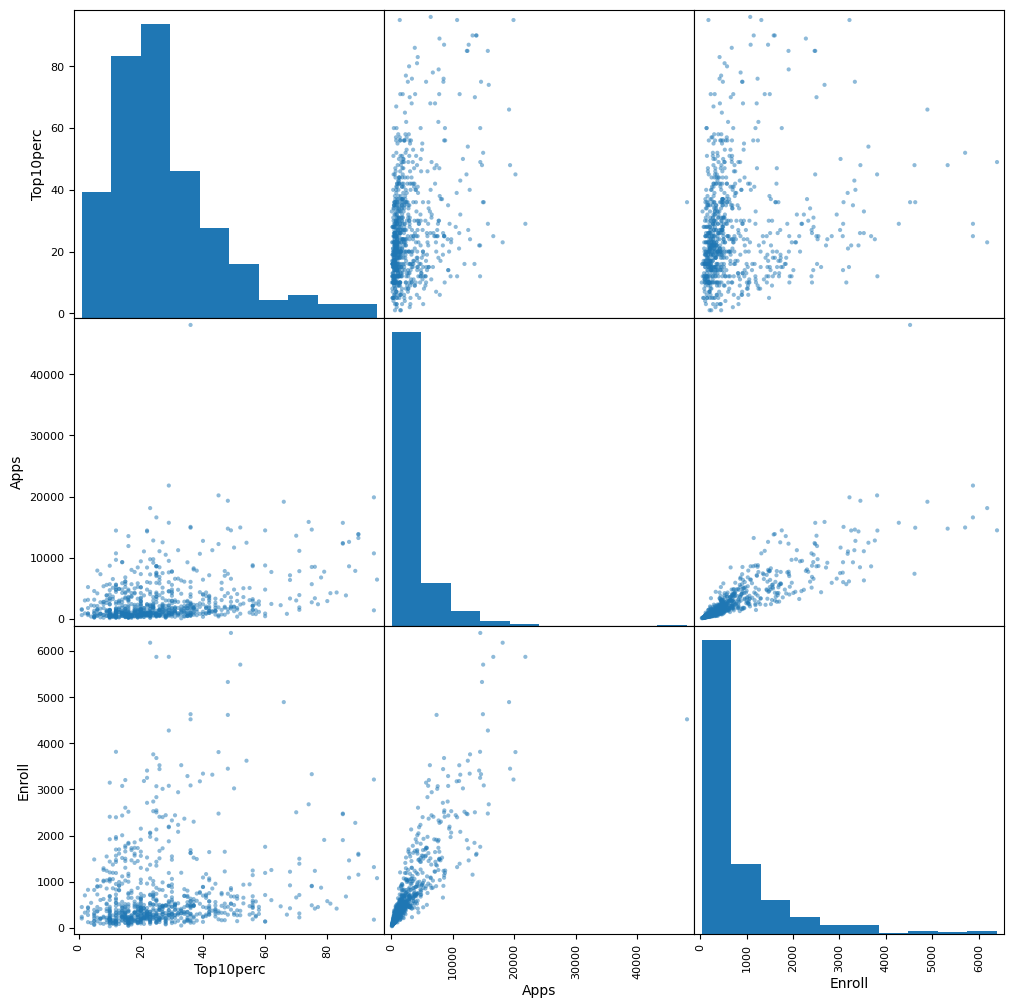

In [69]:
#d
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']], figsize=(12, 12))

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

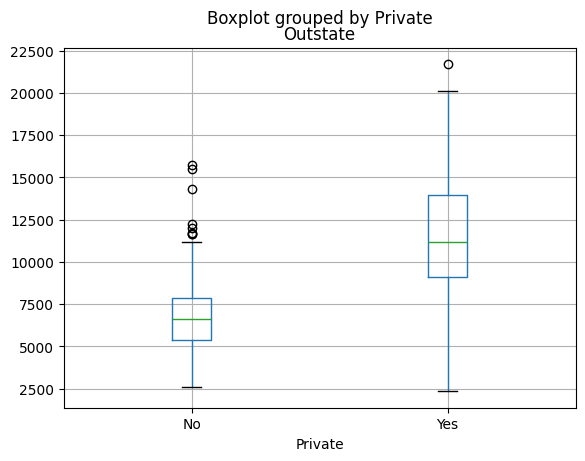

In [70]:
#e
college.boxplot(column='Outstate', by='Private')

In [71]:
#f
college['Elite'] = pd.cut(college['Top10perc'],
                          [0, 50, 100],
                          labels=['No', 'Yes '])
college['Elite'].value_counts()

Elite
No      699
Yes      78
Name: count, dtype: int64

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

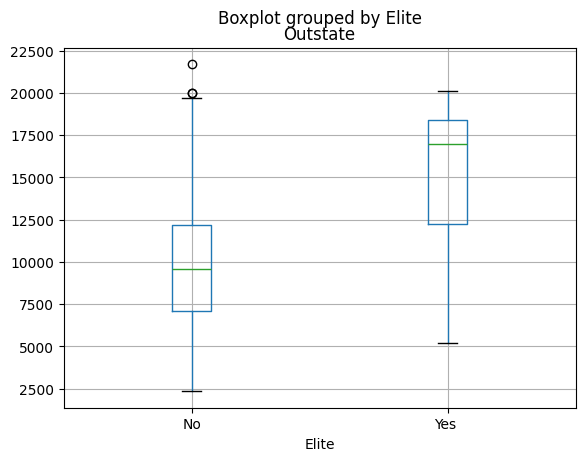

In [72]:
college.boxplot(column='Outstate', by='Elite')

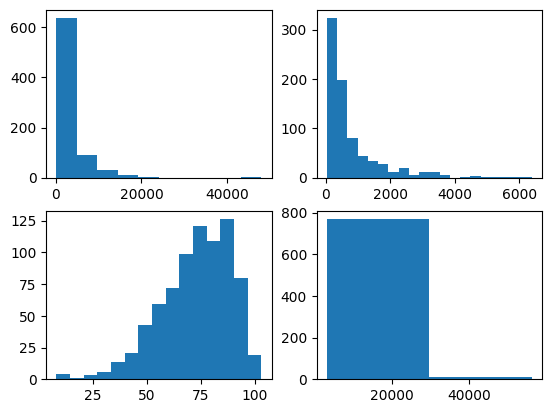

In [73]:
#g
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2)
axes[0,0].hist(college['Apps'], bins=10)
axes[0,1].hist(college['Enroll'], bins=20)
axes[1,0].hist(college['PhD'], bins=15)
axes[1,1].hist(college['Expend'], bins=2)
fig;

In [74]:
Auto = pd.read_csv(isl_data.Auto, na_values='?')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [75]:
#10
Boston = pd.read_csv(isl_data.Boston)
Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
